<a href="https://colab.research.google.com/github/minghsu0107/License-manager/blob/master/my-keras/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convnet for MNIST

In [0]:
import tensorflow as tf
from keras import layers  # 從 keras 套件匯入 layers, models 套件
from keras import models

model = models.Sequential() 
		     #過濾器數量 ↓      ↓過濾器長寬
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # 加入 Covn2d 層
model.add(layers.MaxPooling2D((2, 2))) # 進行 MaxPooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())  # 將 3D 張量展開攤平為 1D, 其 shape = (576, )
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11493376/11490434 [==============================] - 1s 0us/step


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 18s 296us/step - loss: 0.1781 - acc: 0.9432
Epoch 2/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0481 - acc: 0.9853
Epoch 3/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.0335 - acc: 0.9898
Epoch 4/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0253 - acc: 0.9925
Epoch 5/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0204 - acc: 0.9937


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 53us/step


0.9898

## Train a Convnet with Small Dataset

In [0]:
import os, shutil

# 解壓縮資料夾所在的目錄路徑
original_dataset_dir = r'./drive/My Drive/dogs-vs-cats/' 
# 用來儲存少量資料集的目錄位置
base_dir = r'./drive/My Drive/cats_and_dogs_small' 
if not os.path.isdir(base_dir): os.mkdir(base_dir)  # 如果目錄不存在, 才建立目錄

# 分拆成訓練、驗證與測試目錄位置
train_dir = os.path.join(base_dir, 'train')
if not os.path.isdir(train_dir): os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')  
if not os.path.isdir(validation_dir): os.mkdir(validation_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir(test_dir): os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.isdir(train_cats_dir): 
    os.mkdir(train_cats_dir) # 用來訓練貓圖片的目錄位置

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.isdir(train_dogs_dir): 
    os.mkdir(train_dogs_dir) # 用來訓練狗圖片的目錄位置

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.isdir(validation_cats_dir): 
    os.mkdir(validation_cats_dir) # 用來驗證貓圖片的目錄位置

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.isdir(validation_dogs_dir): 
    os.mkdir(validation_dogs_dir) # 用來驗證狗圖片的目錄位置

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.isdir(test_cats_dir): 
    os.mkdir(test_cats_dir) # 用來測試貓圖片的目錄位置

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.isdir(test_dogs_dir): 
    os.mkdir(test_dogs_dir) # 用來測試狗圖片的目錄位置




# 複製前面 1000 張貓圖片到 train_cats_dir 訓練目錄
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 500 張貓圖片到 validation_cats_dir 驗證目錄
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 500 張貓圖片到 test_cats_dir 測試目錄
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 複製前面 1000 張狗圖片到 train_dogs_dir 訓練目錄
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 500 張狗圖片到 validation_dogs_dir 驗證目錄
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 500 張狗圖片到 test_dogs_dir 測試目錄
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

print('複製完成')

複製完成


In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()  # 查看模型摘要

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) #設定訓練、測試資料的 Python 產生器，並將圖片像素值依 1/255 比例重新壓縮到 [0, 1]
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,              # 目標目錄
    target_size=(150, 150),  # 調整所有影像大小成 150x150
    batch_size=20,
    class_mode='binary')    # 因為使用二元交叉熵 binary_crossentropy 作為損失值，所以需要二位元標籤
                            # default: 'categorical' (one hot encoding)
                            # 'sparse': 1D 整數標籤


validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
validation_generator.class_indices

{'cats': 0, 'dogs': 1}

In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100, # get a batch of 100 data from train generator
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50) # get a batch of 50 data from validation generator

Epoch 1/30
100/100 [==============================] - 11s 113ms/step - loss: 0.6956 - acc: 0.5235 - val_loss: 0.6852 - val_acc: 0.5330
Epoch 2/30
100/100 [==============================] - 10s 99ms/step - loss: 0.6780 - acc: 0.5750 - val_loss: 0.6530 - val_acc: 0.6110
Epoch 3/30
100/100 [==============================] - 10s 100ms/step - loss: 0.6475 - acc: 0.6305 - val_loss: 0.6329 - val_acc: 0.6340
Epoch 4/30
100/100 [==============================] - 10s 102ms/step - loss: 0.5731 - acc: 0.7015 - val_loss: 0.5957 - val_acc: 0.6710
Epoch 5/30
100/100 [==============================] - 10s 100ms/step - loss: 0.5312 - acc: 0.7285 - val_loss: 0.6276 - val_acc: 0.6490
Epoch 6/30
100/100 [==============================] - 10s 101ms/step - loss: 0.4945 - acc: 0.7640 - val_loss: 0.5874 - val_acc: 0.6880
Epoch 7/30
100/100 [==============================] - 10s 104ms/step - loss: 0.4544 - acc: 0.7855 - val_loss: 0.5826 - val_acc: 0.7020
Epoch 8/30
100/100 [==============================] - 10

In [0]:
model.save('./drive/My Drive/cats-dogs-models/cats_and_dogs_small_1.h5')

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Overfitting after 5th epoch.

## Data Augmentation

In [0]:
datagen = ImageDataGenerator(
    rotation_range=40, # rotation angle (0 to 180)
    width_shift_range=0.2, # random shift (horizontal)
    height_shift_range=0.2, # random shift (vertical)
    shear_range=0.2, # 隨機傾斜
    zoom_range=0.2, # 隨機縮放
    horizontal_flip=True, # 隨機水平翻轉 (圖不為左右對稱才有效)
    fill_mode='nearest')

'''
fill_mode: fill the white space after image tranformation

- constant: cval=k, kkkkk|abcd|abcd
- nearest (default): aaaaa|abcd|ddddd
- reflect: abcddcba|abcd|dcbaabcd
- wrap: abcdabcd|abcd|abcdabcd
'''

'\nfill_mode: fill the white space after image tranformation\n\n- constant: cval=k, kkkkk|abcd|abcd\n- nearest (default): aaaaa|abcd|ddddd\n- reflect: abcddcba|abcd|dcbaabcd\n- wrap: abcdabcd|abcd|abcdabcd\n'

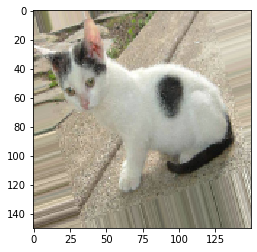

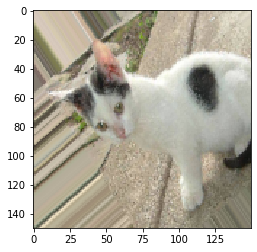

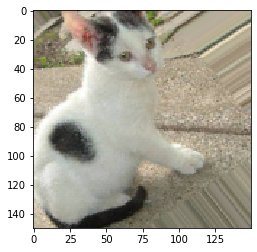

In [0]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
    fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1, ) + x.shape)

i = 0
# loop endlessly
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #  在這裡加入 Dropout 層 (丟棄 50 %)
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, )

test_datagen = ImageDataGenerator(rescale=1./255) # 請注意！驗證資料不應該擴充!!!

train_generator = train_datagen.flow_from_directory(
	train_dir,    # 目標目錄
	target_size=(150, 150), # 所有圖像大小調整成 150×150 
	batch_size=32,
	class_mode='binary') # 因為使用二元交叉熵 binary_crossentropy 作為損失，所以需要二元標籤


validation_generator = test_datagen.flow_from_directory(
	validation_dir,
	target_size=(150, 150),
	batch_size=32,
	class_mode='binary')

# 訓練
history = model.fit_generator(   
	train_generator,
	steps_per_epoch=100,
	epochs=100,
	validation_data=validation_generator,
	validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 31s 307ms/step - loss: 0.6918 - acc: 0.5250 - val_loss: 0.6837 - val_acc: 0.5495
Epoch 2/100
100/100 [==============================] - 28s 282ms/step - loss: 0.6777 - acc: 0.5737 - val_loss: 0.6576 - val_acc: 0.6205
Epoch 3/100
100/100 [==============================] - 28s 282ms/step - loss: 0.6641 - acc: 0.6006 - val_loss: 0.6543 - val_acc: 0.6117
Epoch 4/100
100/100 [==============================] - 28s 281ms/step - loss: 0.6470 - acc: 0.6284 - val_loss: 0.6170 - val_acc: 0.6469
Epoch 5/100
100/100 [==============================] - 27s 269ms/step - loss: 0.6240 - acc: 0.6531 - val_loss: 0.5935 - val_acc: 0.6840
Epoch 6/100
100/100 [==============================] - 30s 296ms/step - loss: 0.6115 - acc: 0.6575 - val_loss: 0.5625 - val_acc: 0.6952
Epoch 7/100
100/100 [==============================] - 28s 279ms/step - loss: 0.6012 - acc: 0.6716 -

In [0]:
model.save('./drive/My Drive/cats-dogs-models/cats_and_dogs_small_2.h5')

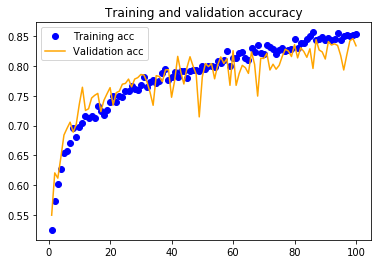

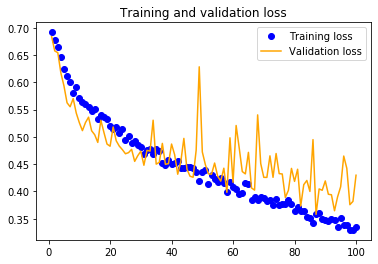

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='orange')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color='orange')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Furthermore, if we apply regulization, and tune the number of units and layers, we can attain higher accuracy (86% to 87%). However, with such few data, it is hard to increase accuracy when buliding the bodel from scratch.

## Pretrained Model


### 沒有資料擴增的快速特徵萃取

The final shape of feature map in VGG16 is (4, 4, 512). Now, we save the output of the convolutional base to the disk, and import it as the input to another dense classifier. This way, we can save the sheer amount of cost for training convolutional base. Data augmentaion is not allowed when applying this method, however.

In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False, # whether the top of conv base is connected to a dense classifier
                  input_shape=(150, 150, 3)) # if we don't specify, the net can handle inputs of any shape
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = r'./drive/My Drive/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        print(i, end=' ') # 由於萃取需要較長的時間，我們印出 i 來檢視進度
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

In [0]:
print(train_features.shape)
print(train_labels.shape)

(2000, 4, 4, 512)
(2000,)


Flatten the data

In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [0]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))  # 丟棄法
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, 
                    train_labels,epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 533us/step - loss: 0.6004 - acc: 0.6660 - val_loss: 0.4396 - val_acc: 0.8320
Epoch 2/30
2000/2000 [==============================] - 1s 253us/step - loss: 0.4272 - acc: 0.8000 - val_loss: 0.3608 - val_acc: 0.8650
Epoch 3/30
2000/2000 [==============================] - 0s 249us/step - loss: 0.3524 - acc: 0.8520 - val_loss: 0.3213 - val_acc: 0.8760
Epoch 4/30
2000/2000 [==============================] - 1s 253us/step - loss: 0.3153 - acc: 0.8640 - val_loss: 0.2999 - val_acc: 0.8870
Epoch 5/30
2000/2000 [==============================] - 0s 248us/step - loss: 0.2861 - acc: 0.8860 - val_loss: 0.2881 - val_acc: 0.8830
Epoch 6/30
2000/2000 [==============================] - 1s 261us/step - loss: 0.2654 - acc: 0.8940 - val_loss: 0.2749 - val_acc: 0.8870
Epoch 7/30
2000/2000 [==============================] - 0s 231us/step - loss: 0.2403 - acc: 0.9045 - val_loss: 0.2637 - val_acc: 0.8910


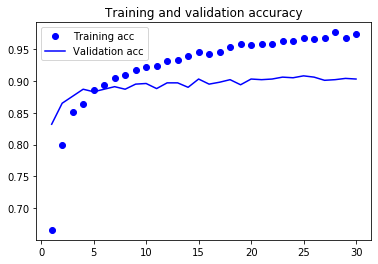

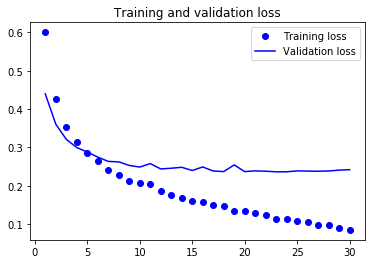

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Now we have achieved about 90% accuracy. However, the model still overfits even though we have added a dropout layer. This is because we did not apply data augmentation while only training with a small dataset.

### 資料擴增的特徵萃取

In [0]:
from keras import models
from keras import layers
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',   # 卷積基底
                  include_top=False,
                  input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)        # 將卷積基底視為層加入 Sequential 模型中
model.add(layers.Flatten()) # 攤平
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) # 增加密集層分類器
model.summary() # 查看模型摘要

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


This way, we will only train weights of two dense layers. Now there are 4 weight tensor: 2 in each dense layer (main weight matrix and interception matrix). If we don't freeze the conv base, there would be 26 + 4 trainable weights: 13 * 2 + 2 * 2. Note that the setting will work after model compilation; we should recompile every time we change the weight settings.

In [0]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False  

print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator( # 擴充訓練資料
	rescale=1./255,
	rotation_range=40,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.2,
	zoom_range=0.2,
	horizontal_flip=True,
	fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255) # 請注意驗證資料不應該擴充


train_generator = train_datagen.flow_from_directory(
	train_dir, # 目標目錄路徑
	target_size=(150, 150), # 調整所有圖像大小成 150×150 
	batch_size=20,
	class_mode='binary') # 因為使用二元交叉熵 binary_crossentropy 作為損失分數，所						以需要二元標籤

validation_generator = test_datagen.flow_from_directory(
	validation_dir,
	target_size=(150, 150),
	batch_size=20,
	class_mode='binary')

model.compile( loss='binary_crossentropy',
			 optimizer=optimizers.RMSprop(lr=2e-5),
			 metrics=['acc'])

history = model.fit_generator(
	train_generator,
	steps_per_epoch=100,
	epochs=30,
	validation_data=validation_generator,
	validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 21s 206ms/step - loss: 0.6162 - acc: 0.6580 - val_loss: 0.4728 - val_acc: 0.8190
Epoch 2/30
100/100 [==============================] - 18s 181ms/step - loss: 0.4966 - acc: 0.7755 - val_loss: 0.3879 - val_acc: 0.8560
Epoch 3/30
100/100 [==============================] - 19s 186ms/step - loss: 0.4397 - acc: 0.8030 - val_loss: 0.3350 - val_acc: 0.8750
Epoch 4/30
100/100 [==============================] - 18s 183ms/step - loss: 0.4085 - acc: 0.8210 - val_loss: 0.3089 - val_acc: 0.8830
Epoch 5/30
100/100 [==============================] - 18s 184ms/step - loss: 0.3866 - acc: 0.8385 - val_loss: 0.2949 - val_acc: 0.8880
Epoch 6/30
100/100 [==============================] - 18s 185ms/step - loss: 0.3693 - acc: 0.8435 - val_loss: 0.2811 - val_acc: 0.8880
Epoch 7/30
100/100 [==============================] - 19s 185ms/step - loss: 0.3611 - acc: 0.8515 - val_lo

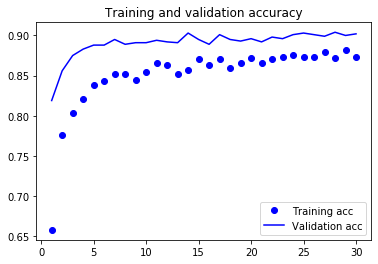

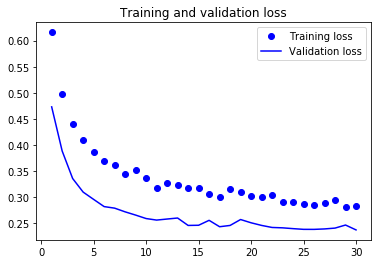

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
""" 若你的 Keras 版本執行程式後的結果與書上有所差異，請將程式 5.23 做以下的修改

這邊提供 2 種修改方式：

方式 1. 將 conv_base.trainable = False  註解掉。

方式 2. 餵給 VGG16 的圖片像素值不要壓到 0-1 之間，將 rescale=1./255 都註解掉，在程式中做以下的修改：

from keras.applications.imagenet_utils import preprocess_input  # 新增這行

train_gen = ImageDataGenerator(
#     rescale=1.0/255,                       # 註解這行
    preprocessing_function=preprocess_input, # 新增這行
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=40,
    horizontal_flip=True,
    fill_mode='nearest'
)
#test_datagen = ImageDataGenerator(1./255)                                 # 註解這行
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) # 新增這行

"""

" 若你的 Keras 版本執行程式後的結果與書上有所差異，請將程式 5.23 做以下的修改\n\n這邊提供 2 種修改方式：\n\n方式 1. 將 conv_base.trainable = False  註解掉。\n\n方式 2. 餵給 VGG16 的圖片像素值不要壓到 0-1 之間，將 rescale=1./255 都註解掉，在程式中做以下的修改：\n\nfrom keras.applications.imagenet_utils import preprocess_input  # 新增這行\n\ntrain_gen = ImageDataGenerator(\n#     rescale=1.0/255,                       # 註解這行\n    preprocessing_function=preprocess_input, # 新增這行\n    height_shift_range=0.2,\n    width_shift_range=0.2,\n    zoom_range=0.2,\n    shear_range=0.2,\n    rotation_range=40,\n    horizontal_flip=True,\n    fill_mode='nearest'\n)\n#test_datagen = ImageDataGenerator(1./255)                                 # 註解這行\ntest_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) # 新增這行\n\n"

In [0]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = True  

print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 4
This is the number of trainable weights after freezing the conv base: 30


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator( # 擴充訓練資料
	rescale=1./255,
	rotation_range=40,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.2,
	zoom_range=0.2,
	horizontal_flip=True,
	fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255) # 請注意驗證資料不應該擴充


train_generator = train_datagen.flow_from_directory(
	train_dir, # 目標目錄路徑
	target_size=(150, 150), # 調整所有圖像大小成 150×150 
	batch_size=20,
	class_mode='binary') # 因為使用二元交叉熵 binary_crossentropy 作為損失分數，所						以需要二元標籤

validation_generator = test_datagen.flow_from_directory(
	validation_dir,
	target_size=(150, 150),
	batch_size=20,
	class_mode='binary')

model.compile( loss='binary_crossentropy',
			 optimizer=optimizers.RMSprop(lr=2e-5),
			 metrics=['acc'])

history = model.fit_generator(
	train_generator,
	steps_per_epoch=100,
	epochs=30,
	validation_data=validation_generator,
	validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 23s 227ms/step - loss: 0.3669 - acc: 0.8410 - val_loss: 0.2472 - val_acc: 0.8890
Epoch 2/30
100/100 [==============================] - 20s 202ms/step - loss: 0.2455 - acc: 0.8950 - val_loss: 0.3342 - val_acc: 0.8750
Epoch 3/30
100/100 [==============================] - 20s 203ms/step - loss: 0.1751 - acc: 0.9250 - val_loss: 0.1100 - val_acc: 0.9610
Epoch 4/30
100/100 [==============================] - 20s 200ms/step - loss: 0.1693 - acc: 0.9330 - val_loss: 0.1085 - val_acc: 0.9610
Epoch 5/30
100/100 [==============================] - 20s 201ms/step - loss: 0.1390 - acc: 0.9470 - val_loss: 0.1691 - val_acc: 0.9280
Epoch 6/30
100/100 [==============================] - 21s 206ms/step - loss: 0.1109 - acc: 0.9500 - val_loss: 0.1633 - val_acc: 0.9560
Epoch 7/30
100/100 [==============================] - 20s 201ms/step - loss: 0.0937 - acc: 0.9635 - val_lo

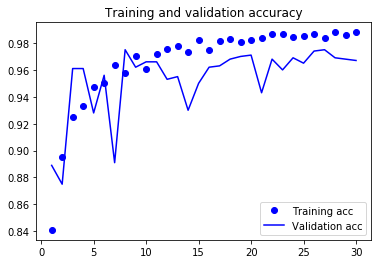

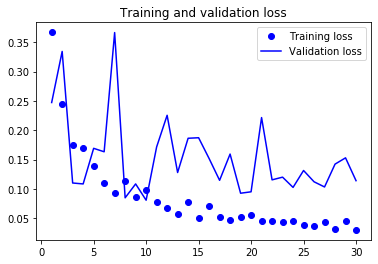

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Now the accuracy is about 96%!

### Fine-Tuning

Previously we freeze the entire convolutional base and train the randomly initialized dense layers. Now we unfreeze some "top" layers and train them along with our added dense layers.

Note that we should always freeze the entire convolutional base and train only the dense layers before applying fine-tuning. Otherwise, the error of back propagation would be too large and break the model weights.

Why do we unfreeze only top 3 layers?

1. Low layers do encoding for more general features, whereas high top layers do encoding for more specific features. Therefore, fine-tuning is more effective on top layers.

2. The more trainable parameters, the more possible we encounter overfitting. This would be too risky when training on a small dataset.

In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.summary()

conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if 'block5_conv' in layer.name:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

**To avoid breaking the original convolutional base, We must we very low learning rate for fine-tuning to limit the modification amplitude of 3 unfreezed convolutional bases.**

In [0]:
# 編譯模型
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc'])

# 訓練模型
history = model.fit_generator(   
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 23s 229ms/step - loss: 0.0191 - acc: 0.9915 - val_loss: 0.1193 - val_acc: 0.9790
Epoch 2/100
100/100 [==============================] - 20s 204ms/step - loss: 0.0080 - acc: 0.9985 - val_loss: 0.1653 - val_acc: 0.9780
Epoch 3/100
100/100 [==============================] - 20s 204ms/step - loss: 0.0184 - acc: 0.9940 - val_loss: 0.1901 - val_acc: 0.9740
Epoch 4/100
100/100 [==============================] - 20s 204ms/step - loss: 0.0231 - acc: 0.9935 - val_loss: 0.1022 - val_acc: 0.9800
Epoch 5/100
100/100 [==============================] - 21s 207ms/step - loss: 0.0163 - acc: 0.9945 - val_loss: 0.1004 - val_acc: 0.9770
Epoch 6/100
100/100 [==============================] - 21s 205ms/step - loss: 0.0176 - acc: 0.9945 - val_loss: 0.1214 - val_acc: 0.9810
Epoch 7/100
100/100 [==============================] - 20s 204ms/step - loss: 0.0082 - acc: 0.9985 - val_loss: 0.1220 - val_acc: 0.9810
Epoch 8/100
100/100 [===========================

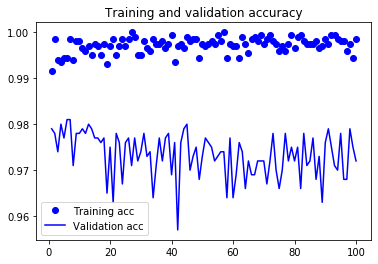

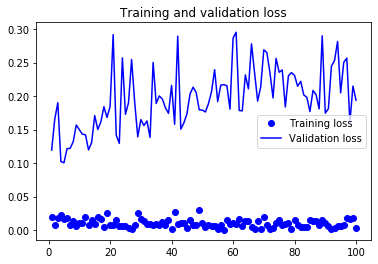

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

繪製平滑曲線

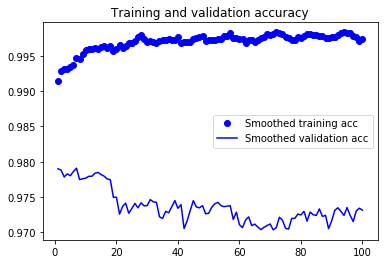

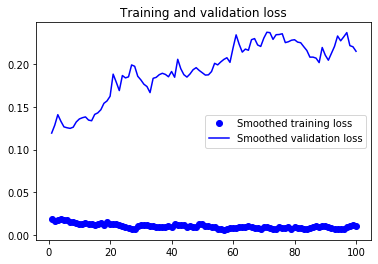

In [0]:
def smooth_curve(points, factor=0.8):
	smoothed_points = []
	for point in points:
		if smoothed_points:
			previous = smoothed_points[-1]
			smoothed_points.append(previous * factor + point * (1 - factor))
		else:
			smoothed_points.append(point)
	return smoothed_points

plt.plot( epochs,
	   smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot( epochs,
	   smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot( epochs,
	   smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot( epochs,
	   smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The accuracy has increased by 1%!

The above graphs show the average of the exponential loss value. However, what really affects the accuracy is the distribution of loss. Therefore, though it seems that the loss is increasing, it's still possible that the model is improved.

In [0]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9639999914169312


## Make Prediction

In [0]:
from keras.models import load_model
model = load_model('./drive/My Drive/cats-dogs-models/cats_and_dogs_small_1.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

In [0]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

img_path = './drive/My Drive/cats_and_dogs_small/validation/dogs/dog.1010.jpg'
img = image.load_img(img_path, target_size=(150, 150))
test_img = image.img_to_array(img)
test_img = test_img.reshape((1, ) + test_img.shape)

plt.figure()
plt.imshow(image.array_to_img(test_img[0]))

In [0]:
print(model.predict(test_img))
print(model.predict_classes(test_img))

[[1.]]
[[1]]


## Visualization

### 中間層輸出的視覺化

In [0]:
from keras.models import load_model
model = load_model('./drive/My Drive/cats-dogs-models/cats_and_dogs_small_1.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

In [0]:
from keras.preprocessing import image
import numpy as np

img_path = './drive/My Drive/cats_and_dogs_small/test/cats/cat.1700.jpg'

# 將這張圖片預處理成 4D 張量並將像素值限制在 0-1 之間
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape) # shape = (1, 150, 150, 3)

(1, 150, 150, 3)


In [0]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [0]:
from keras import models 

layer_outputs = [layer.output for layer in model.layers[:8]]
for op in layer_outputs: 
    print(op)

# craeate a model given input as same as original model and has 8 outputs (one for each leayer in conv base)
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

Tensor("conv2d_7_2/Relu:0", shape=(?, 148, 148, 32), dtype=float32)
Tensor("max_pooling2d_5_2/MaxPool:0", shape=(?, 74, 74, 32), dtype=float32)
Tensor("conv2d_8_2/Relu:0", shape=(?, 72, 72, 64), dtype=float32)
Tensor("max_pooling2d_6_2/MaxPool:0", shape=(?, 36, 36, 64), dtype=float32)
Tensor("conv2d_9_2/Relu:0", shape=(?, 34, 34, 128), dtype=float32)
Tensor("max_pooling2d_7_2/MaxPool:0", shape=(?, 17, 17, 128), dtype=float32)
Tensor("conv2d_10_2/Relu:0", shape=(?, 15, 15, 128), dtype=float32)
Tensor("max_pooling2d_8_2/MaxPool:0", shape=(?, 7, 7, 128), dtype=float32)


In [0]:
activations = activation_model.predict(img_tensor)
print(len(activations))

first_layer_activation = activations[0]
print(first_layer_activation.shape)

8
(1, 148, 148, 32)


In [0]:
import matplotlib.pyplot as plt

# matshow is a wrapper for imshow, in that it "sets origin to ‘upper’, ‘interpolation’ to ‘nearest’ and ‘aspect’ to equal."
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis') # viridis: 紫綠黃

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


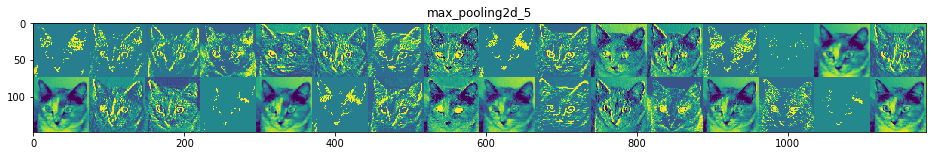

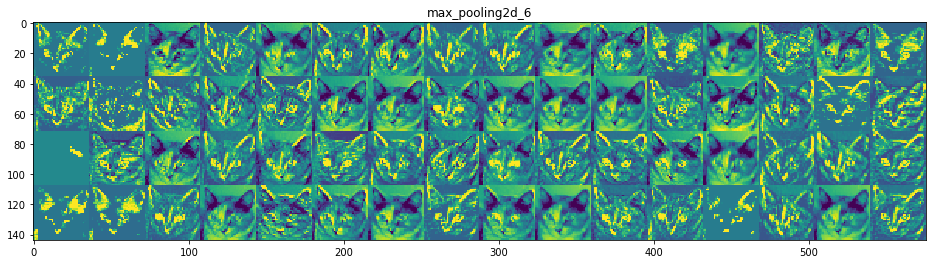

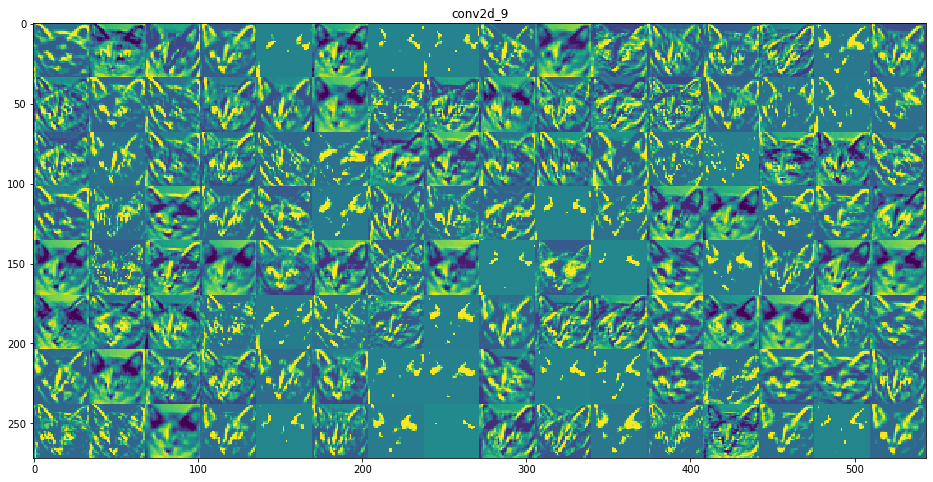

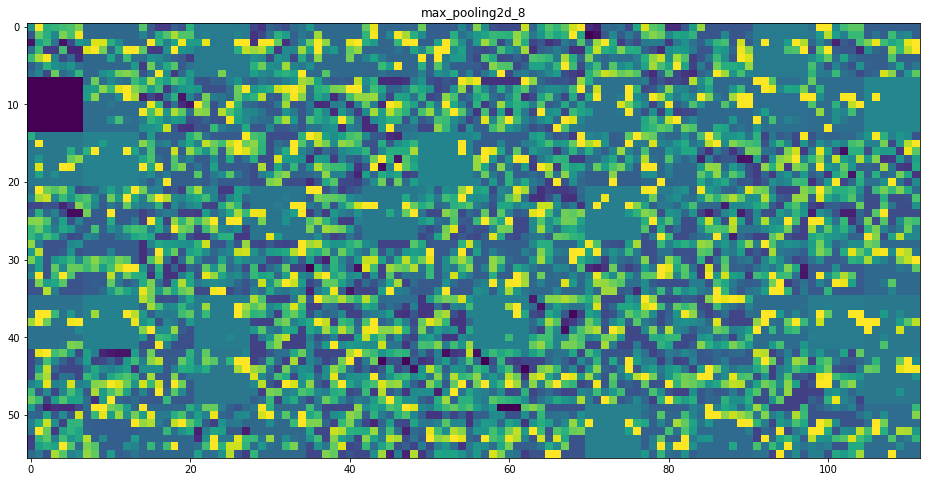

In [0]:
layer_names = []

# 取得各層的名字，這樣才可以成為圖表的一部分
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            # np.clip: Given an interval, values outside the interval are clipped to the interval edges
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0])) # x is horizontal for plt
    plt.title(layer_name)
    plt.grid(False) # do not show grid line
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

啟動函數的輸出隨著深度增加越來越稀疏，且各層萃取的的特徵越來越抽象(與輸入影像越來越無關)，而關於目標的資訊越來越多(在此為類別:貓或狗)

可以想像成模型層層過濾掉該影像獨有的圖案，最後剩下有用的資訊(在此為影像的類別)

也就是說，各層輸出由細節紋理到簡單抽象; 而各層本身的最大響應(過濾掉的部分)則由簡單到複雜(見下節)

### 視覺化 convnet 的 filter

我們想要看某convnet filter (某feature map的某channel)的最大響應的影像

因此我們必須使用梯度上升讓該filter的output最大化!

In [0]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output 

# computes the mean over all dimensions (default, when axis=None)
loss = K.mean(layer_output[:, :, :, filter_index]) # 定義損失函數張量, 其為層輸出張量數值取平均

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
model.input.shape # input can be of any shape

TensorShape([Dimension(None), Dimension(None), Dimension(None), Dimension(3)])

In [0]:
# gradients() 會傳回一個由張量組成的list, 在本例中, list 的大小為 1, 因此, 只取出其第 0 個元素, 即 grads 是 1 個梯度張量
grads = K.gradients(loss, model.input)[0]

In [0]:
# grads divided by its L2 norm to ensure the updating amplitude
# 在做除法之前先加上 1e-5 以避免意外地除以 0
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [0]:
iterate = K.function([model.input], [loss, grads]) # 定義一個 Keras 後端函式

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])
#輸出損失張量與梯度張量				↑將此做為輸入張量

In [0]:
# 從帶有雜訊的灰階圖像開始
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128. # 1...

step = 1. # 每個梯度更新的大小
for i in range(40): # 執行梯度上升 40 步
	loss_value, grads_value = iterate([input_img_data]) # 計算損失值和梯度值
	input_img_data += grads_value * step # 2. 以朝向最大化損失調整輸入圖像 (以前SGD 是用 -= 算符, 現在反過來是用 += 算符)

In [0]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)				# 1. 張量正規化：以 0 為中心, 確保 std 為 0.1 
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1) # 修正成 [0, 1], 即 0-1 之間 
    
    x *= 255 # 微調
    x = np.clip(x, 0, 255).astype('uint8')		# 2.轉換成 RGB 陣列
    return x

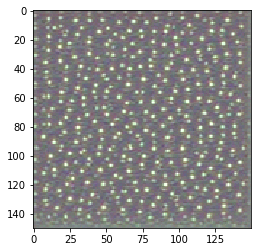

In [0]:
import matplotlib.pyplot as plt

def generate_pattern(layer_name, filter_index, size=150):
	layer_output = model.get_layer(layer_name).output # 取得指定層的輸出張量
	loss = K.mean(layer_output[:, :, :, filter_index]) # 1. 取得指定過濾器的輸出張量, 並以最大化此張量的均值做為損失


	grads = K.gradients(loss, model.input)[0] # 根據此損失計算輸入影像的梯度

	grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) # 標準化技巧：梯度標準化

	iterate = K.function([model.input], [loss, grads]) # 2.建立 Keras function 來針對給定的輸入影像回傳損失和梯度

	input_img_data = np.random.random((1, size, size, 3)) * 20 + 128. # 3. 從帶有雜訊的灰階影像開始
	

	step = 1.
	for i in range(40): # 執行梯度上升 40 步
		loss_value, grads_value = iterate([input_img_data]) # 4. 針對給定的輸入影像回傳損失和梯度
		input_img_data += grads_value * step

	img = input_img_data[0]
	return deprocess_image(img)	  # 進行圖像後處理後回傳


plt.imshow(generate_pattern('block3_conv1', 0)) # 我們來看看 block3_conv1 層中的過濾器 0 的特徵圖

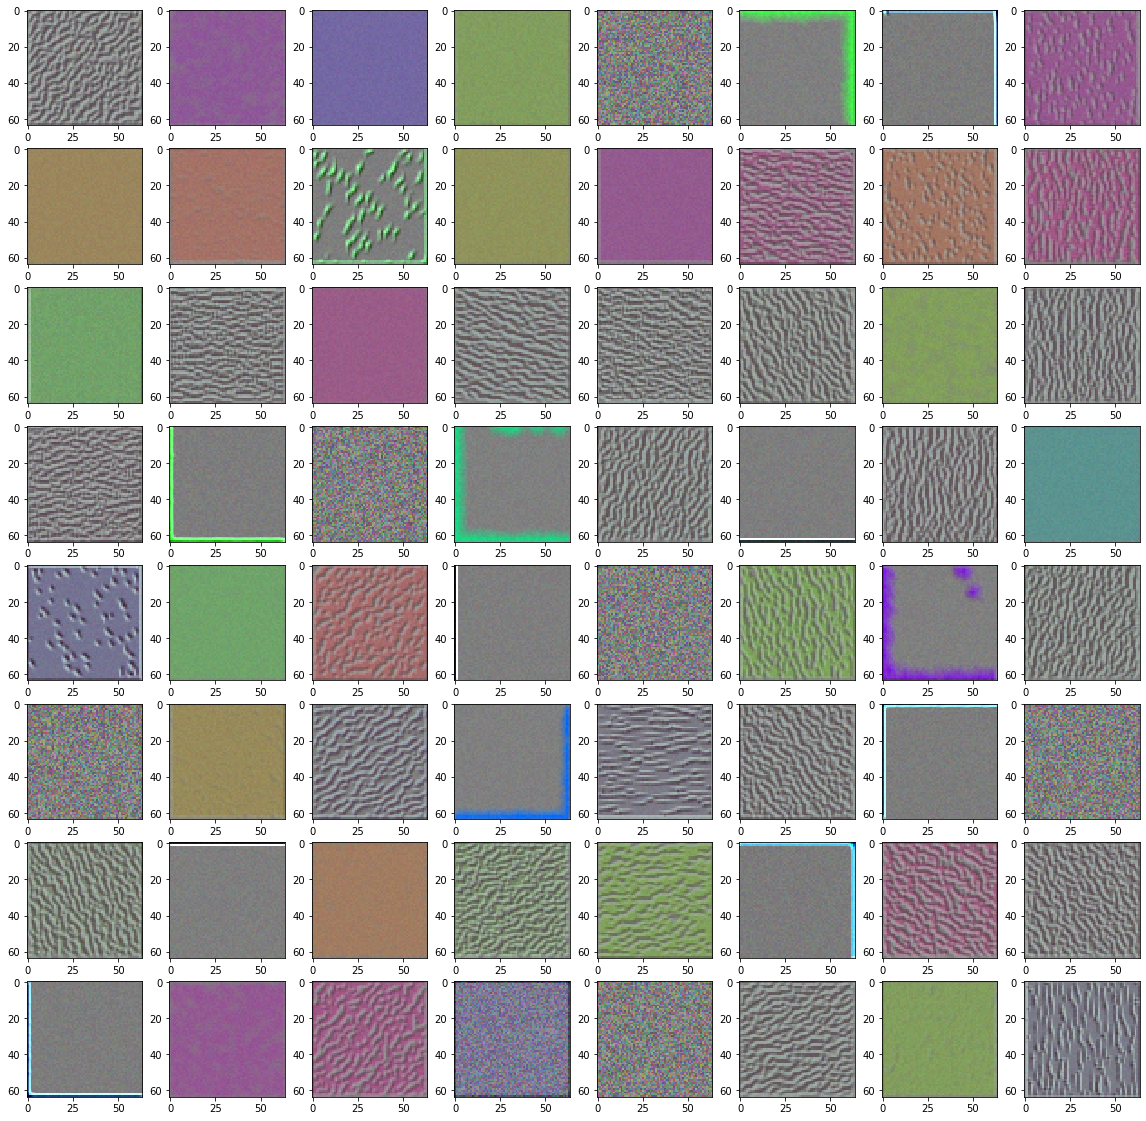

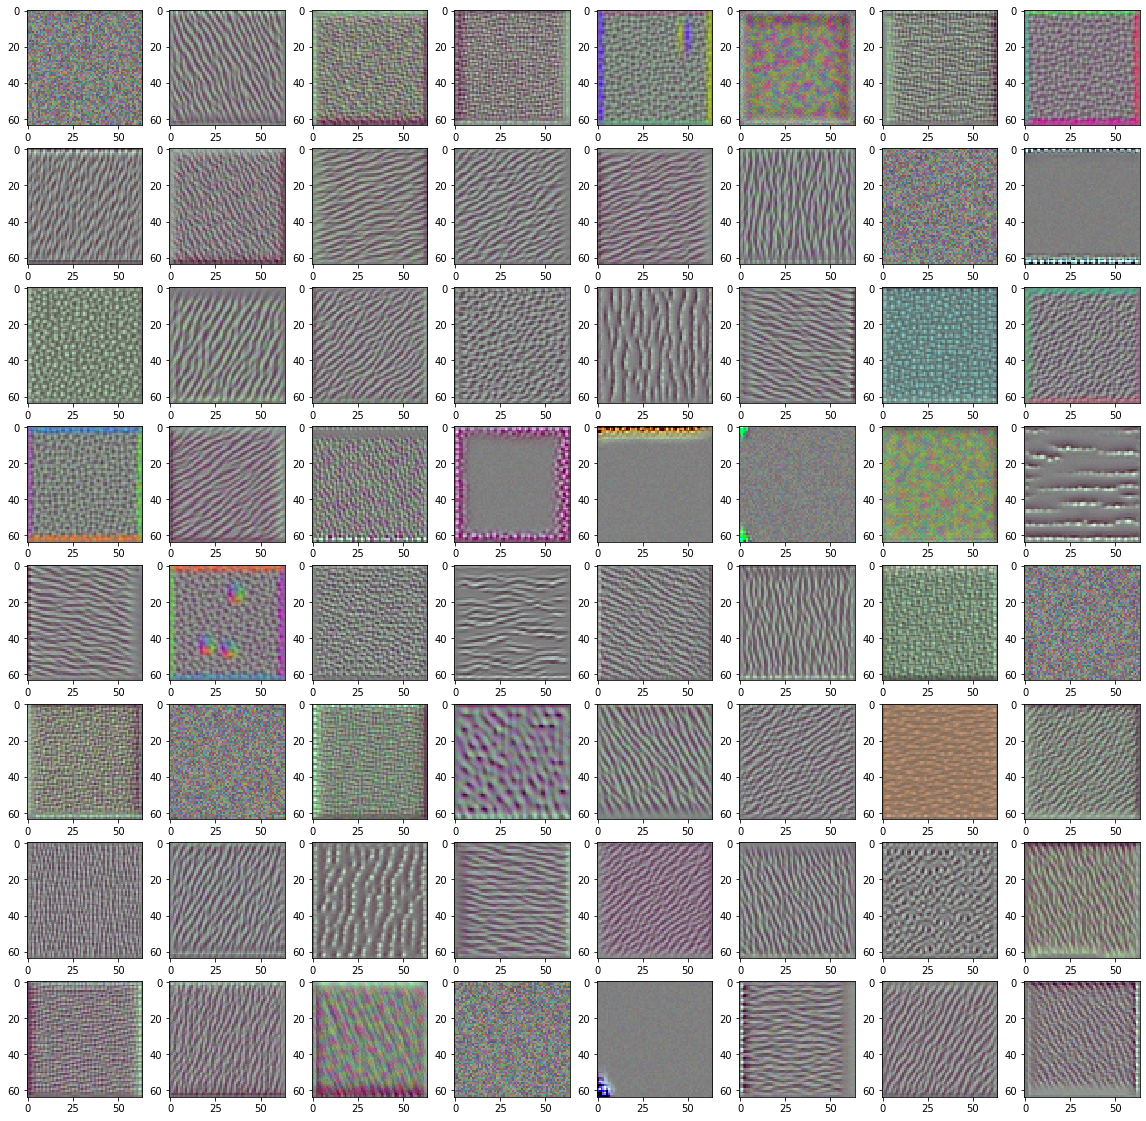

In [0]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5

    plt.figure(figsize=(20, 20))
    for i in range(8):  # ← 迭代產生網格的行
        for j in range(8):  # ←迭代產生網格的列
            # 在 layer_name 中產生過濾器 i +(j * 8) 的 pattern
            ax = plt.subplot2grid((8, 8), (i, j))
            ax.imshow(generate_pattern(layer_name, i + (j * 8), size=size))
    plt.show()

當model越疊越高，filter就會變得越來越精細(從簡單的邊與顏色到複雜的紋理)

### Heatmap of class activation

In [0]:
from keras.applications.vgg16 import VGG16
 
model = VGG16(weights='imagenet')  # 請注意, 在頂部包含了密集連接的分類器 (預設 include_top=True)

In [0]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = './drive/My Drive/cats_and_dogs_small/african_elephants.jpg'

img = image.load_img(img_path, target_size=(224, 224))
print(type(img))  # 目前圖片為 <class 'PIL.Image.Image'> 物件
print(img.size)  # 可以用 size 屬性查看尺寸 -> (224, 224)

x = image.img_to_array(img) 	# 將 PIL 物件轉為 float32 的 Numpy 陣列
print(x.shape) 				# shape=(224, 224, 3)


# 將 x 陣列 (可視為張量) 增加一個批次軸, shape=(1, 224, 224, 3)
x = np.expand_dims(x, axis=0)
print(x.shape)

# 將 RGB 轉換為 BGR，並解減去各通道平均
x = preprocess_input(x) # 預處理批次量 (這會對每一 channel 做顏色值正規化)

<class 'PIL.Image.Image'>
(224, 224)
(224, 224, 3)
(1, 224, 224, 3)


In [0]:
preds = model.predict(x)
print('預測結果:', decode_predictions(preds, top=3)[0]) # see the first image

np.argmax(preds[0]) # see the first image

預測結果: [('n02504458', 'African_elephant', 0.74306846), ('n01871265', 'tusker', 0.14720677), ('n02504013', 'Indian_elephant', 0.10971093)]


386

Grad-CAM Algorithm

先求出某類別對最後一層conv layer的輸出的梯度(即最後一層輸出的feature map的每個channel對於此類別的重要程度)

然而每個channel對於此類別的重要程度目前為張量，我們要將他變成量值

因此我們再對梯度中每個channel對應的張量池化，變成一個1D陣列, shape = (num_channel,), 此陣列即表示各channel對於此類別的重要程度的量值！

現在將最後一層輸出的feature map的每個channel加權重要程度

最後的熱圖就是加權後的feature map的跨channel平均 (可以想像成是把所有channel疊圖加總)

In [0]:
from keras import backend as K

african_elephant_output = model.output[:, 386] # ← 預測向量中的 "非洲象" 項目

last_conv_layer = model.get_layer('block5_conv3') # block5_conv3 層的輸出特徵圖, 其為 VGG16 中的最後一個卷積層

'''
tf.keras.backend.gradients(
    target_func,
    variables
)
'''
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0] #  "非洲象" 類別對於block5_conv3 的輸出特徵圖中的梯度

# # 求得針對每個 feature map channel的梯度加總
pooled_grads = K.mean(grads, axis=(0, 1, 2)) #  轉換成向量 shape = (512, ), 其中每個項目是特定特徵圖 channel 的梯度平均強度(值)

#  給定輸入影像的條件下, 讓我們可以存取剛剛定義的數值：pooled_grads 和 block5_conv3 的輸出特徵圖
iterate = K.function([model.input], 
    [pooled_grads, last_conv_layer.output[0]])

#  對於給定的兩隻大象樣本影像, 產生這兩個量值, 以 Numpy 陣列呈現
pooled_grads_value, conv_layer_output_value = iterate([x])

# 將特徵圖陣列中的每個 channel 與 "大象" 類別相關的 "此 channel 的重要程度" 相乘
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# 特徵圖的跨 channel 平均值是類別激活函數輸出的熱圖
heatmap = np.mean(conv_layer_output_value, axis=-1) # 即 axis=2 (求跨channel的平均)
# heatmap.shape = (14, 14)

In [0]:
model.output[:, 386].shape

TensorShape([Dimension(None)])

In [0]:
last_conv_layer.output.shape

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(512)])

In [0]:
print(grads.shape)
print(pooled_grads.shape)
print(pooled_grads_value.shape)
print(conv_layer_output_value.shape)

(?, 14, 14, 512)
(512,)
(512,)
(14, 14, 512)


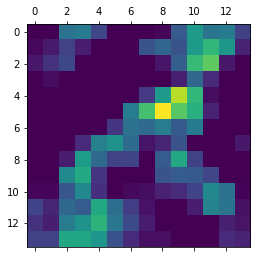

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# 做正規化-> [0, 1]
heatmap = np.maximum(heatmap, 0) # change negative values to 0 (ReLU)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [0]:
import cv2

# img is RGB
img = cv2.imread(img_path)

print(img.shape)
print(heatmap.shape)

# cv2.resize(target, (width, height))
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0])) # adjust the shape to be as same as img

print(heatmap.shape)

heatmap = np.uint8(255 * heatmap) # change to RGB

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET) # change heatmap to be colorful (3D)

print(heatmap.shape)

superimposed_img = heatmap * 0.4 + img # 這裡 0.4 是熱圖強度因子

print('是否儲存成功:', cv2.imwrite('./drive/My Drive/cats_and_dogs_small/elephant_cam.jpg', superimposed_img))


(256, 512, 3)
(14, 14)
(256, 512)
(256, 512, 3)
是否儲存成功: True
